In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [290]:
df=pd.read_excel("Alzheimer.xlsx")

In [291]:
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0,1987,696,883
1,Nondemented,M,88,14,2.0,30.0,0,2004,681,876
2,Demented,M,75,12,NaN,23.0,5,1678,736,1046
3,Demented,M,76,12,NaN,28.0,5,1738,713,101
4,Demented,M,80,12,NaN,22.0,5,1698,701,1034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,5,1693,694,1037
369,Demented,M,86,16,1.0,26.0,5,1688,675,104
370,Nondemented,F,61,13,2.0,30.0,0,1319,801,1331
371,Nondemented,F,63,13,2.0,30.0,0,1327,796,1323


In [292]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,1.774799,1488.128686,662.611260,1098.439678
std,7.640957,2.876339,1.134005,3.683244,2.291337,176.139286,203.835828,341.268372
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,7.000000,1.000000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,694.000000,1054.000000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,724.000000,1183.000000
75%,82.000000,16.000000,3.000000,30.000000,5.000000,1597.000000,751.000000,1291.000000
max,98.000000,23.000000,5.000000,30.000000,5.000000,2004.000000,837.000000,1587.000000


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    int64  
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    int64  
 9   ASF     373 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 29.3+ KB


In [294]:
df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [295]:
from sklearn.impute import SimpleImputer

In [296]:
imputer=SimpleImputer(missing_values=np.nan, strategy="mean")

In [297]:
eksik_veriler=df.iloc[:,2:10].values

In [298]:
eksik_veriler

array([[8.700e+01, 1.400e+01, 2.000e+00, ..., 1.987e+03, 6.960e+02,
        8.830e+02],
       [8.800e+01, 1.400e+01, 2.000e+00, ..., 2.004e+03, 6.810e+02,
        8.760e+02],
       [7.500e+01, 1.200e+01,       nan, ..., 1.678e+03, 7.360e+02,
        1.046e+03],
       ...,
       [6.100e+01, 1.300e+01, 2.000e+00, ..., 1.319e+03, 8.010e+02,
        1.331e+03],
       [6.300e+01, 1.300e+01, 2.000e+00, ..., 1.327e+03, 7.960e+02,
        1.323e+03],
       [6.500e+01, 1.300e+01, 2.000e+00, ..., 1.333e+03, 8.010e+02,
        1.317e+03]])

In [299]:
imputer=imputer.fit(eksik_veriler)

In [300]:
eksik_veriler=imputer.transform(eksik_veriler)

In [301]:
eksik_veriler

array([[8.70000000e+01, 1.40000000e+01, 2.00000000e+00, ...,
        1.98700000e+03, 6.96000000e+02, 8.83000000e+02],
       [8.80000000e+01, 1.40000000e+01, 2.00000000e+00, ...,
        2.00400000e+03, 6.81000000e+02, 8.76000000e+02],
       [7.50000000e+01, 1.20000000e+01, 2.46045198e+00, ...,
        1.67800000e+03, 7.36000000e+02, 1.04600000e+03],
       ...,
       [6.10000000e+01, 1.30000000e+01, 2.00000000e+00, ...,
        1.31900000e+03, 8.01000000e+02, 1.33100000e+03],
       [6.30000000e+01, 1.30000000e+01, 2.00000000e+00, ...,
        1.32700000e+03, 7.96000000e+02, 1.32300000e+03],
       [6.50000000e+01, 1.30000000e+01, 2.00000000e+00, ...,
        1.33300000e+03, 8.01000000e+02, 1.31700000e+03]])

In [302]:
# encoding group

In [303]:
type(df["Group"])

pandas.core.series.Series

In [304]:
ham_veri=pd.DataFrame(df["Group"],columns=["Group"])
ham_veri

,Group
0,Nondemented
1,Nondemented
2,Demented
3,Demented
4,Demented
...,...
368,Demented
369,Demented
370,Nondemented
371,Nondemented


In [305]:
# sütun tipini gör -> object
ham_veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Group   373 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [306]:
# sütun tipini "category" ye dönüştür
ham_veri["Group"]=ham_veri["Group"].astype("category")

In [307]:
# sütun tipini tekrar gör -> object
ham_veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Group   373 non-null    category
dtypes: category(1)
memory usage: 637.0 bytes


In [308]:
# kategorik numerik veriler ata ve yeni bir sütun yarat
ham_veri["Group"]=ham_veri["Group"].cat.codes
ham_veri

,Group
0,2
1,2
2,1
3,1
4,1
...,...
368,1
369,1
370,2
371,2


In [309]:
# encoding m/f

In [310]:
type(df["M/F"])

pandas.core.series.Series

In [311]:
ham_veri_mf=pd.DataFrame(df["M/F"],columns=["M/F"])
ham_veri_mf

,M/F
0,M
1,M
2,M
3,M
4,M
...,...
368,M
369,M
370,F
371,F


In [312]:
# sütun tipini gör -> object
ham_veri_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   M/F     373 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [313]:
# sütun tipini "category" ye dönüştür
ham_veri_mf["M/F"]=ham_veri_mf["M/F"].astype("category")

In [314]:
# sütun tipini tekrar gör -> object
ham_veri_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   M/F     373 non-null    category
dtypes: category(1)
memory usage: 629.0 bytes


In [315]:
# kategorik numerik veriler ata ve yeni bir sütun yarat
ham_veri_mf["M/F"]=ham_veri_mf["M/F"].cat.codes
ham_veri_mf

,M/F
0,1
1,1
2,1
3,1
4,1
...,...
368,1
369,1
370,0
371,0


In [316]:
# dataframe birleştirme işlemi
veri=pd.concat([ham_veri,ham_veri_mf],axis=1)

In [317]:
veri

,Group,M/F
0,2,1
1,2,1
2,1,1
3,1,1
4,1,1
...,...,...
368,1,1
369,1,1
370,2,0
371,2,0


In [318]:
sonuc=pd.DataFrame(data=eksik_veriler,index=range(373),columns=["Age","EDUC","SES","MMSE","CDR","eTIV","nWBV","ASF"])

In [319]:
sonuc

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,87.0,14.0,2.000000,27.0,0.0,1987.0,696.0,883.0
1,88.0,14.0,2.000000,30.0,0.0,2004.0,681.0,876.0
2,75.0,12.0,2.460452,23.0,5.0,1678.0,736.0,1046.0
3,76.0,12.0,2.460452,28.0,5.0,1738.0,713.0,101.0
4,80.0,12.0,2.460452,22.0,5.0,1698.0,701.0,1034.0
...,...,...,...,...,...,...,...,...
368,82.0,16.0,1.000000,28.0,5.0,1693.0,694.0,1037.0
369,86.0,16.0,1.000000,26.0,5.0,1688.0,675.0,104.0
370,61.0,13.0,2.000000,30.0,0.0,1319.0,801.0,1331.0
371,63.0,13.0,2.000000,30.0,0.0,1327.0,796.0,1323.0


In [320]:
yeni_veri=pd.concat([veri,sonuc],axis=1)

In [321]:
yeni_veri

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87.0,14.0,2.000000,27.0,0.0,1987.0,696.0,883.0
1,2,1,88.0,14.0,2.000000,30.0,0.0,2004.0,681.0,876.0
2,1,1,75.0,12.0,2.460452,23.0,5.0,1678.0,736.0,1046.0
3,1,1,76.0,12.0,2.460452,28.0,5.0,1738.0,713.0,101.0
4,1,1,80.0,12.0,2.460452,22.0,5.0,1698.0,701.0,1034.0
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82.0,16.0,1.000000,28.0,5.0,1693.0,694.0,1037.0
369,1,1,86.0,16.0,1.000000,26.0,5.0,1688.0,675.0,104.0
370,2,0,61.0,13.0,2.000000,30.0,0.0,1319.0,801.0,1331.0
371,2,0,63.0,13.0,2.000000,30.0,0.0,1327.0,796.0,1323.0


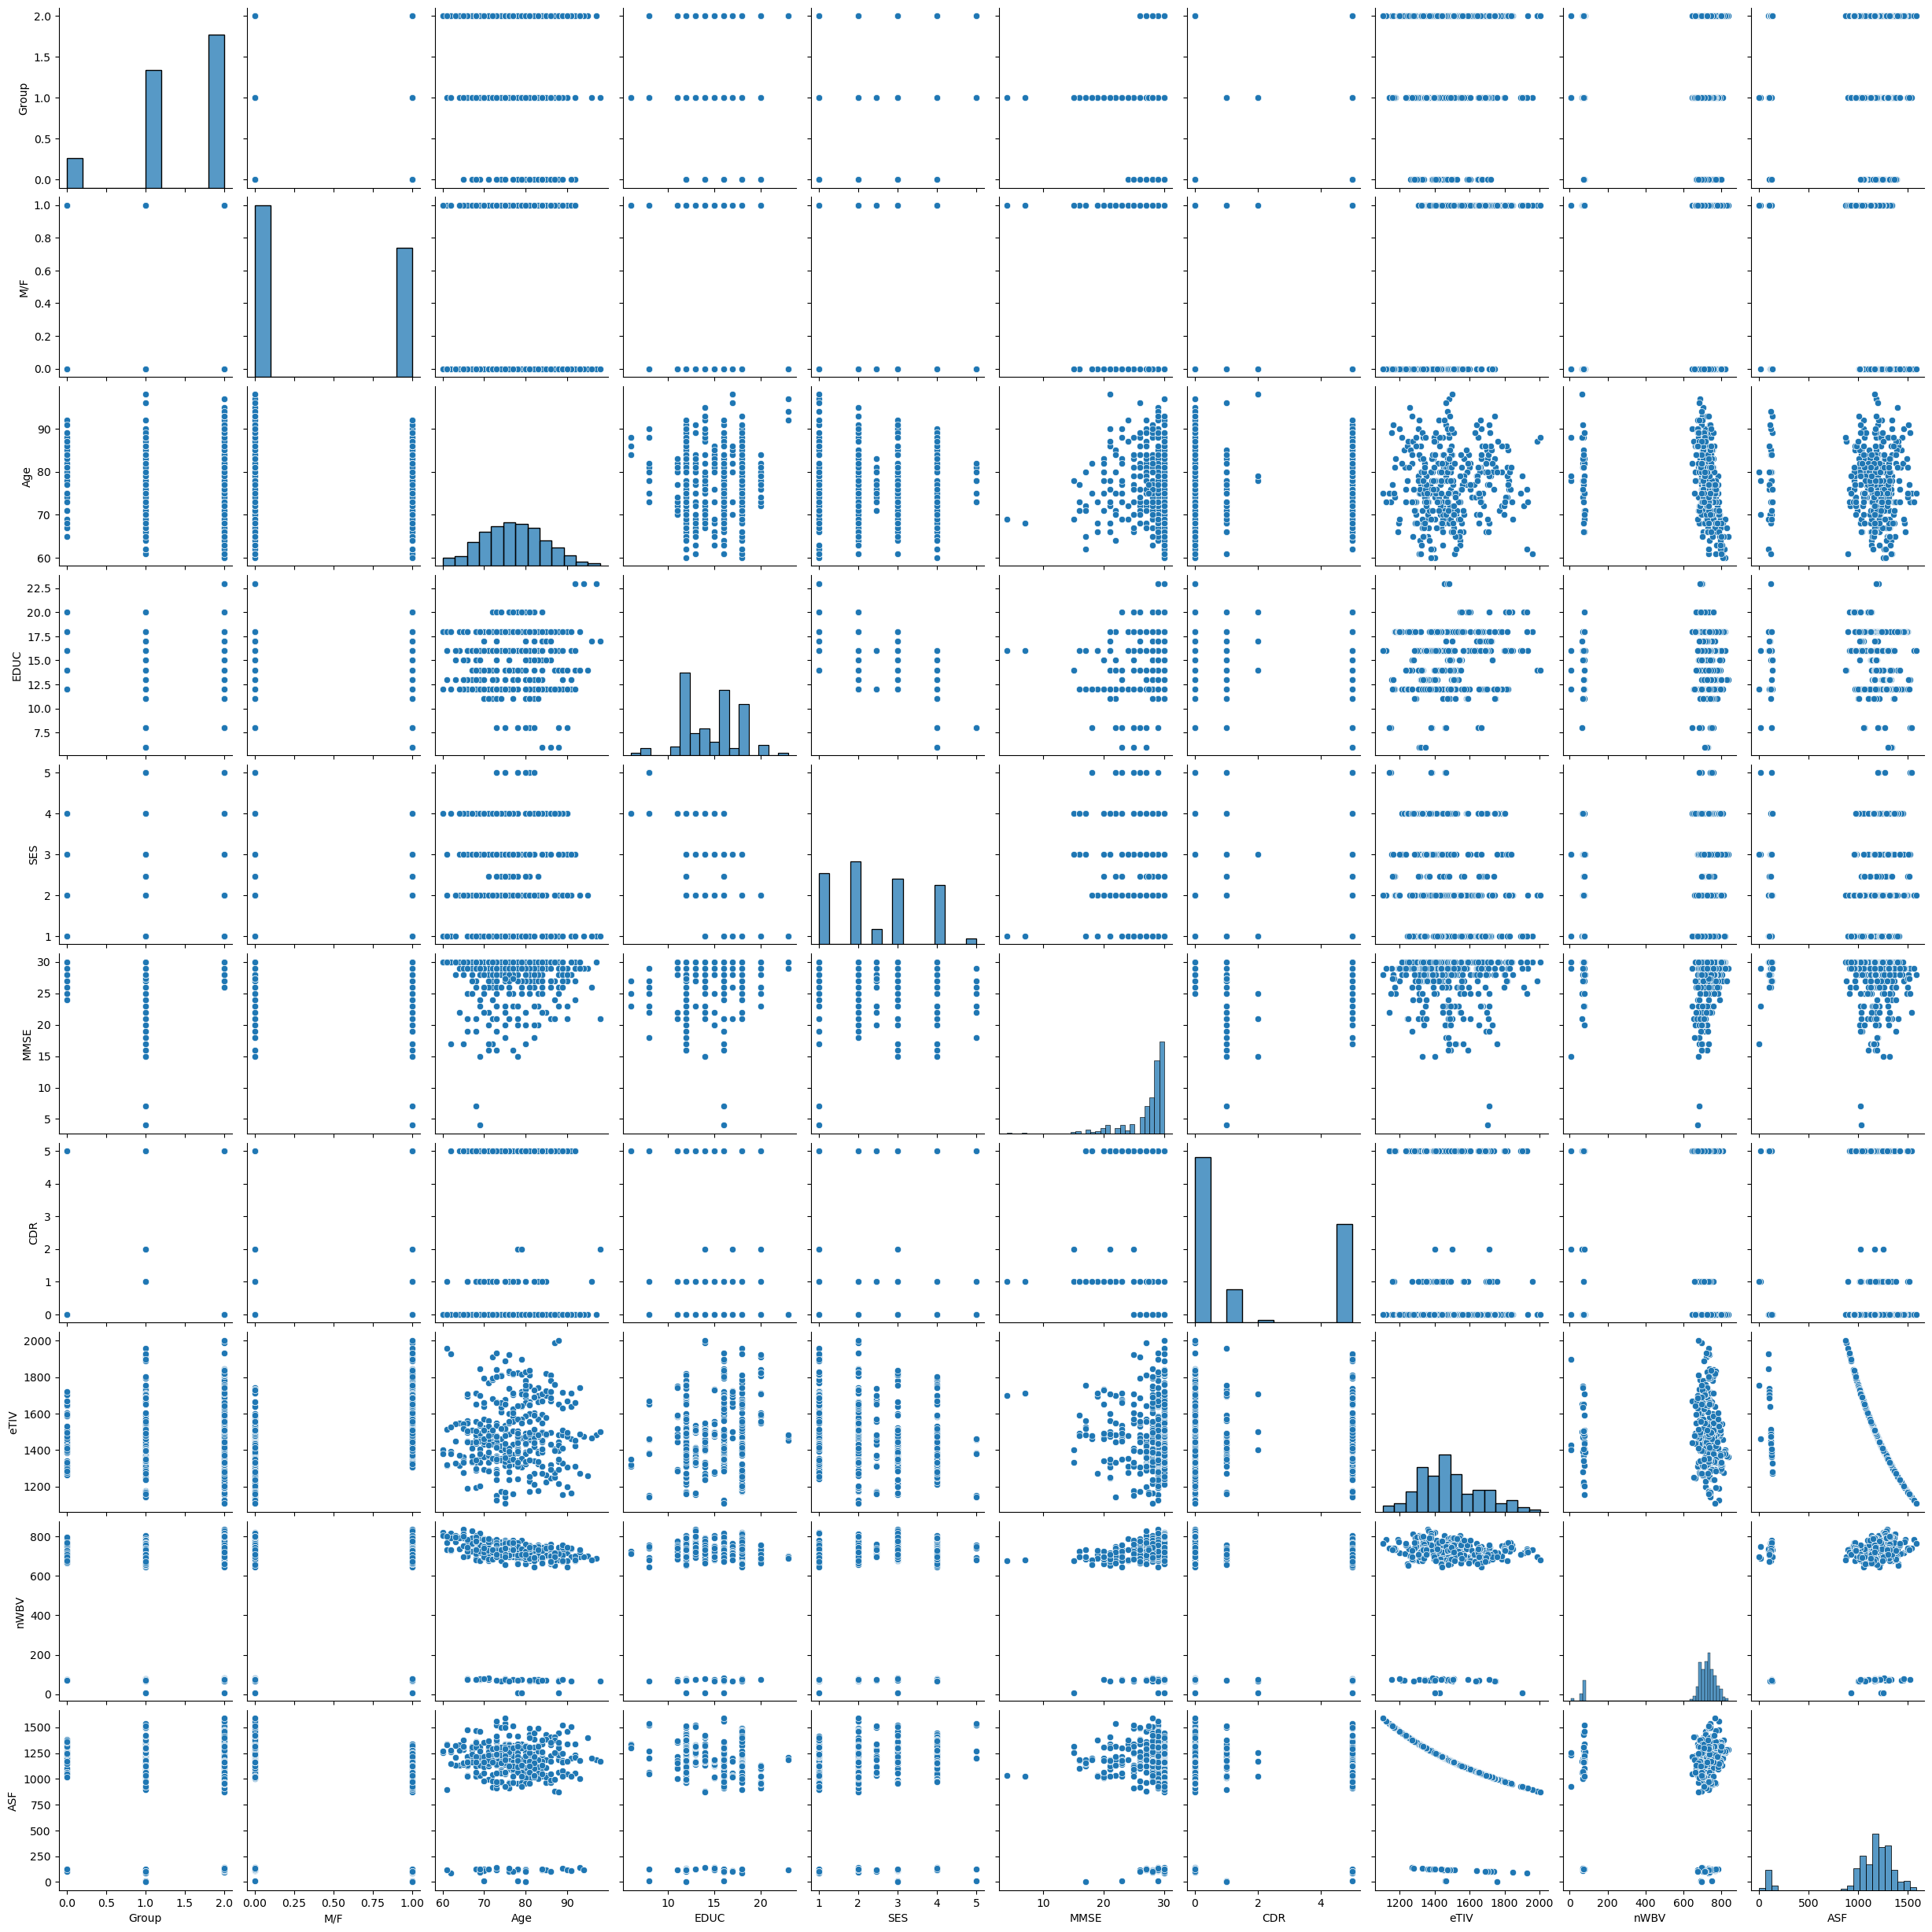

In [322]:
# datayı görselleştirme

# pairplot -> ikili
sbn.pairplot(yeni_veri)

In [323]:
# inputlar
x=yeni_veri[["M/F","Age","EDUC","SES","MMSE","CDR","eTIV","nWBV","ASF"]]
x

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,87.0,14.0,2.000000,27.0,0.0,1987.0,696.0,883.0
1,1,88.0,14.0,2.000000,30.0,0.0,2004.0,681.0,876.0
2,1,75.0,12.0,2.460452,23.0,5.0,1678.0,736.0,1046.0
3,1,76.0,12.0,2.460452,28.0,5.0,1738.0,713.0,101.0
4,1,80.0,12.0,2.460452,22.0,5.0,1698.0,701.0,1034.0
...,...,...,...,...,...,...,...,...,...
368,1,82.0,16.0,1.000000,28.0,5.0,1693.0,694.0,1037.0
369,1,86.0,16.0,1.000000,26.0,5.0,1688.0,675.0,104.0
370,0,61.0,13.0,2.000000,30.0,0.0,1319.0,801.0,1331.0
371,0,63.0,13.0,2.000000,30.0,0.0,1327.0,796.0,1323.0


In [324]:
# output 
y=yeni_veri["Group"]
y

0      2
1      2
2      1
3      1
4      1
      ..
368    1
369    1
370    2
371    2
372    2
Name: Group, Length: 373, dtype: int8

In [325]:
yeni_veri.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

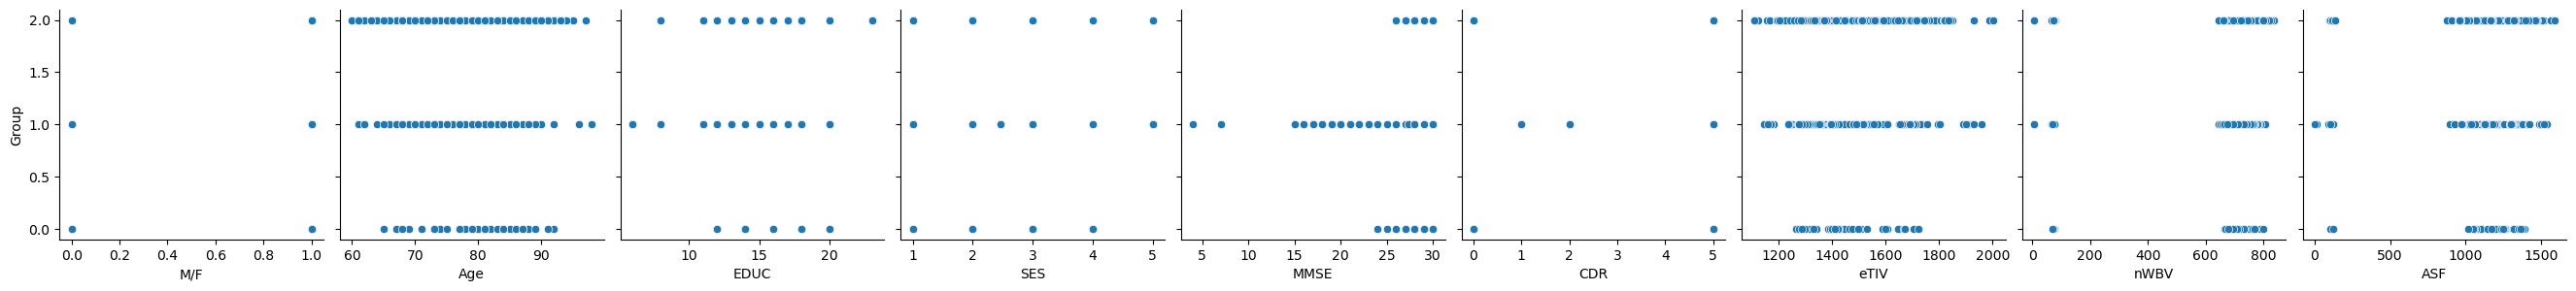

In [326]:
# sadece girdiler -> çıktı ikilisi
sbn.pairplot(yeni_veri,x_vars=yeni_veri.columns[1:10],y_vars=yeni_veri.columns[0],height=3)

In [327]:
# modeli oluştur

# sklearn LinearRegression
from sklearn.linear_model import LinearRegression

In [328]:
# lineer regression nesnesini yarat
lr=LinearRegression()

In [329]:
# hazırlık

# önce input'un ve output'un boyutuna bakalım
print("x'in boyutu: ",x.shape)
print("y'nin boyutu: ",y.shape)

x'in boyutu:  (373, 9)
y'nin boyutu:  (373,)


In [330]:
# y'yi yeniden boyutlandırmamız lazım
# (200,1) şeklinde

y=y.values.reshape(-1,1)

In [331]:
# y'nin yeni boyutu
print("y'nin boyutu: ",y.shape)

y'nin boyutu:  (373, 1)


In [332]:
# scikit-learn'den import
from sklearn.model_selection import train_test_split

In [333]:
# train data
# x_train, y_train

# test data
# x_test, y_test

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.30,random_state=100)

In [334]:
# şekiller
print("x_train'in boyutu: ",x_train.shape)
print("y_train'in boyutu: ",y_train.shape)

print("x_test'in boyutu: ",x_test.shape)
print("y_test'in boyutu: ",y_test.shape)

x_train'in boyutu:  (261, 9)
y_train'in boyutu:  (261, 1)
x_test'in boyutu:  (112, 9)
y_test'in boyutu:  (112, 1)


In [335]:
# lineer regresyon modelini çalıştır (fit)

# regresyonu çalıştır -> fit
# fit -> öğrenme
# train data üzerinden

lr.fit(x_train,y_train)

LinearRegression()

In [336]:
# katsayıları hesaplama (intercepr_, coef_)

# intercept -> beta 0

print("intercept: ",lr.intercept_)

intercept:  [-1.26919835]


In [337]:
# slope= coefficient -> beta 1, beta 2, beta 3
print("slope (coefficient) eğim: ",lr.coef_)

slope (coefficient) eğim:  [[-8.13290723e-02 -4.22443688e-03  3.49730065e-02  1.95659033e-01
   3.59871548e-02 -1.57892471e-01  7.46289473e-04  8.33532466e-05
   1.21660221e-04]]


In [338]:
katsayilar=pd.DataFrame(lr.coef_, columns=["beta_1 (M/F)","beta_2 (Age)","beta_3 (EDUC)","beta_4 (SES)","beta_5 (MMSE)","beta_6 (CDR)","beta_7 (eTIV)","beta_8 (nWBV)","beta_9 (ASF)"])
katsayilar

,beta_1 (M/F),beta_2 (Age),beta_3 (EDUC),beta_4 (SES),beta_5 (MMSE),beta_6 (CDR),beta_7 (eTIV),beta_8 (nWBV),beta_9 (ASF)
0,-0.081329,-0.004224,0.034973,0.195659,0.035987,-0.157892,0.000746,0.000083,0.000122


In [339]:
# tahmin yap (predict)
y_pred=lr.predict(x_test)

In [340]:
# tahmini yazdır
y_pred

array([[0.89715597],
       [0.89931944],
       [1.91567645],
       [1.18205112],
       [0.57717044],
       [0.93278155],
       [1.63402244],
       [0.80055606],
       [1.51077707],
       [2.03657472],
       [1.92179997],
       [0.76953975],
       [1.62934407],
       [1.96770557],
       [0.82921782],
       [1.62769098],
       [0.81200566],
       [1.84865066],
       [1.10201515],
       [1.64213681],
       [0.59845062],
       [0.58285429],
       [1.76864494],
       [1.57323817],
       [1.70044736],
       [1.89717895],
       [0.72395075],
       [1.99220481],
       [1.39208854],
       [1.58331876],
       [1.77852033],
       [1.50217417],
       [1.78268135],
       [2.05985668],
       [0.96125077],
       [0.75060602],
       [2.06527068],
       [0.69305893],
       [1.35511117],
       [1.61005112],
       [1.01708659],
       [1.5664575 ],
       [1.66906254],
       [1.84906442],
       [1.24304817],
       [1.51298833],
       [1.53747464],
       [1.586

In [341]:
# tahmin datasının şekli
y_pred.shape

(112, 1)

In [342]:
# test datasının (orijinal data) şekli
# y_true

y_test.shape

(112, 1)

In [343]:
# gerçek data ve tahmin datasını çiz

# ilk 10 gerçek y değerini görelim
y_test[0:10]

array([[1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2]], dtype=int8)

In [344]:
# ilk 10 tahmin değerini görelim
y_pred[0:10]

array([[0.89715597],
       [0.89931944],
       [1.91567645],
       [1.18205112],
       [0.57717044],
       [0.93278155],
       [1.63402244],
       [0.80055606],
       [1.51077707],
       [2.03657472]])

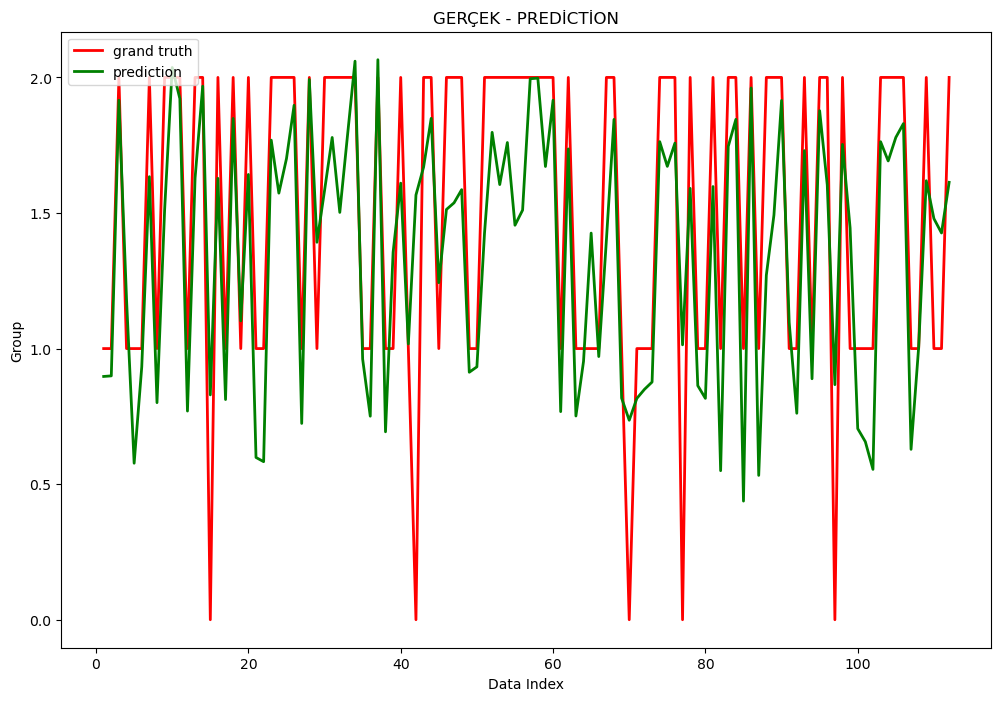

In [345]:
# her bir tahmin noktasındaki değişimi görelim
indexler=range(1,113)

# gerçek data -> grand truth
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test,label="grand truth",color="red",linewidth=2)

# tahmin -> prediction
ax.plot(indexler,y_pred,label="prediction",color="green",linewidth=2)

plt.title("GERÇEK - PREDİCTİON")
plt.xlabel("Data Index")
plt.ylabel("Group")
plt.legend(loc="upper left")
plt.show()

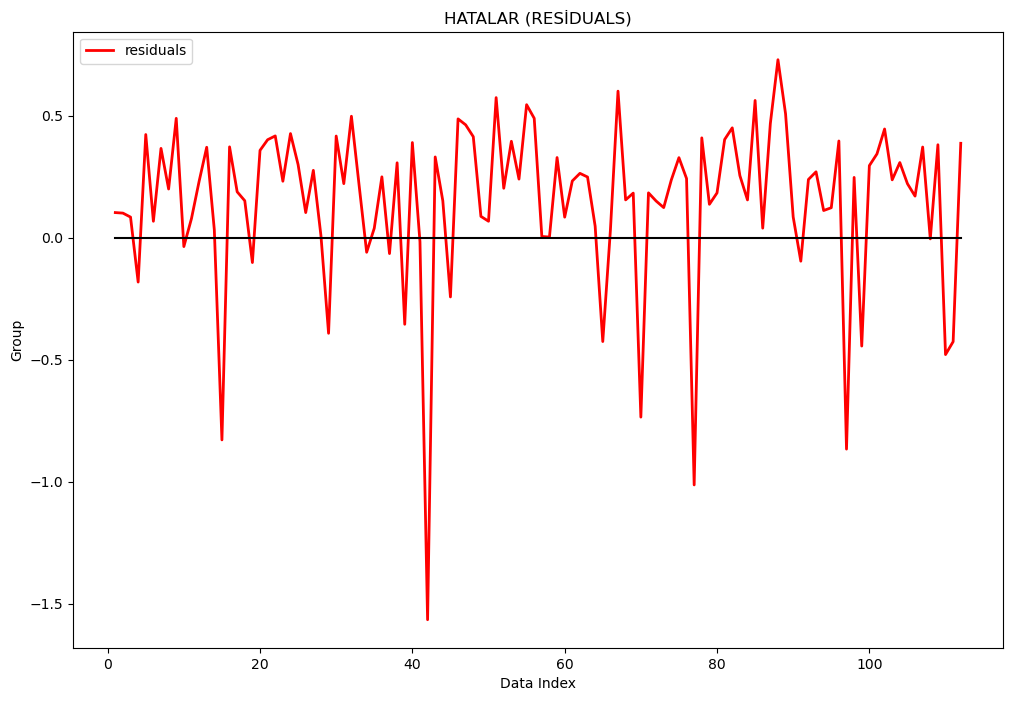

In [346]:
# hataları çiz (residual)
# y_test - y_pred

# her bir tahmin noktasındaki hatayı görelim
indexler=range(1,113)

# residuals -> hatalar
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(indexler,y_test - y_pred,label="residuals",color="red",linewidth=2)

# sıfır doğrusunu çiz
ax.plot(indexler,np.zeros(112),color="black")

plt.title("HATALAR (RESİDUALS)")
plt.xlabel("Data Index")
plt.ylabel("Group")
plt.legend(loc="upper left")
plt.show()

In [347]:
# model doğruluğunu kontrol et (RMSE VR R^2)
# model doğruluğu kontrol etme

from sklearn.metrics import r2_score, mean_squared_error

In [348]:
# R^2 yi hesaplayalım
r_2=r2_score(y_test,y_pred)

In [349]:
# R^2 yazdır
print("R^2: ",r_2)

R^2:  0.5861143644012339


In [350]:
# R^2 % olarak yazdır
print("R^2 %: ",r_2*100)

R^2 %:  58.611436440123384


In [351]:
# MSE -> RMSE
mse=mean_squared_error(y_test,y_pred)

In [352]:
# MSE'yi yazdır
print("MSE: ",mse)

MSE:  0.14042548350672424


In [353]:
# RMSE
import math
rmse=math.sqrt(mse)

In [354]:
# RMSE yazdır
print("RMSE: ",rmse)

RMSE:  0.37473388358503723


In [355]:
# OLS

In [356]:
import statsmodels.api as sm

In [357]:
x_train_ols=sm.add_constant(x_train)

In [358]:
x_train

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
26,1,77.0,16.0,3.000000,16.0,1.0,1590.0,696.0,1104.0
173,0,73.0,12.0,4.000000,16.0,1.0,1478.0,696.0,1188.0
35,0,92.0,14.0,1.000000,27.0,5.0,1423.0,696.0,1234.0
260,0,77.0,12.0,3.000000,29.0,0.0,1344.0,74.0,1306.0
39,1,72.0,20.0,1.000000,26.0,5.0,1911.0,719.0,919.0
...,...,...,...,...,...,...,...,...,...
343,1,70.0,16.0,4.000000,26.0,5.0,1796.0,742.0,977.0
359,1,73.0,12.0,2.460452,23.0,5.0,1661.0,698.0,1056.0
323,1,78.0,12.0,2.460452,29.0,1.0,1569.0,704.0,1119.0
280,1,75.0,18.0,2.000000,30.0,5.0,1651.0,737.0,1063.0


In [359]:
x_train_ols

,const,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
26,1.0,1,77.0,16.0,3.000000,16.0,1.0,1590.0,696.0,1104.0
173,1.0,0,73.0,12.0,4.000000,16.0,1.0,1478.0,696.0,1188.0
35,1.0,0,92.0,14.0,1.000000,27.0,5.0,1423.0,696.0,1234.0
260,1.0,0,77.0,12.0,3.000000,29.0,0.0,1344.0,74.0,1306.0
39,1.0,1,72.0,20.0,1.000000,26.0,5.0,1911.0,719.0,919.0
...,...,...,...,...,...,...,...,...,...,...
343,1.0,1,70.0,16.0,4.000000,26.0,5.0,1796.0,742.0,977.0
359,1.0,1,73.0,12.0,2.460452,23.0,5.0,1661.0,698.0,1056.0
323,1.0,1,78.0,12.0,2.460452,29.0,1.0,1569.0,704.0,1119.0
280,1.0,1,75.0,18.0,2.000000,30.0,5.0,1651.0,737.0,1063.0


In [360]:
# statsmodels OLS modeli oluştur

sm_model=sm.OLS(y_train, x_train_ols)

In [361]:
# OLS modelinin sonuçlarını al

sonuc=sm_model.fit()

In [362]:
# OLS özet tablosunu yazdır

print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     19.86
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           4.86e-25
Time:                        22:03:22   Log-Likelihood:                -204.05
No. Observations:                 261   AIC:                             428.1
Df Residuals:                     251   BIC:                             463.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2692      0.705     -1.800      0.0

C:\Users\ebrar\AppData\Local\Temp\ipykernel_8092\608688507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(df.corr(),annot=True)


<Axes: >

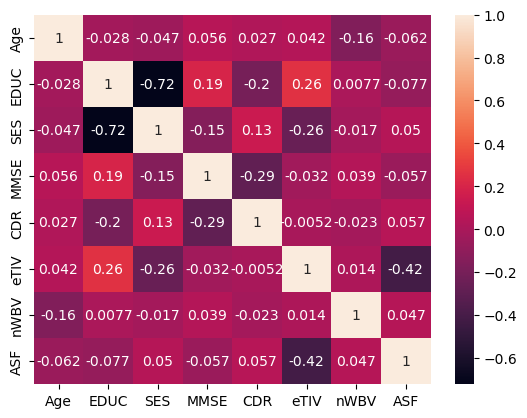

In [363]:
# korelasyon (correlation)
sbn.heatmap(df.corr(),annot=True)

In [364]:
# sonuçlara göre tekrar model oluştur

# yeni feature matrisi
# x_train_yeni
# x_test_yeni

x_train_yeni=x_train[["SES","MMSE","CDR","eTIV"]]
x_train_yeni.head()

,SES,MMSE,CDR,eTIV
26,3.0,16.0,1.0,1590.0
173,4.0,16.0,1.0,1478.0
35,1.0,27.0,5.0,1423.0
260,3.0,29.0,0.0,1344.0
39,1.0,26.0,5.0,1911.0


In [365]:
x_test_yeni=x_test[["SES","MMSE","CDR","eTIV"]]
x_test_yeni.head()

,SES,MMSE,CDR,eTIV
161,5.000000,25.0,5.0,1151.0
178,4.000000,26.0,5.0,1273.0
132,2.000000,30.0,0.0,1664.0
98,1.000000,21.0,1.0,1708.0
208,2.460452,23.0,5.0,1484.0


In [366]:
# modeli tekrar kurgula
lr.fit(x_train_yeni,y_train)

LinearRegression()

In [367]:
# yeni tahminleri al
y_pred_yeni=lr.predict(x_test_yeni)

In [368]:
# yeni tahminler
y_pred_yeni

array([[0.88643121],
       [0.86267216],
       [1.7979939 ],
       [1.1903017 ],
       [0.66952991],
       [0.98488966],
       [1.50966275],
       [0.79279329],
       [1.69875398],
       [1.87985657],
       [1.82739528],
       [0.86134232],
       [1.70105997],
       [2.00058989],
       [0.87667631],
       [1.62051328],
       [0.81688354],
       [1.8863627 ],
       [1.10794319],
       [1.48960798],
       [0.84657055],
       [0.6013822 ],
       [1.82920543],
       [1.53502865],
       [1.64468585],
       [1.99400311],
       [0.78509384],
       [1.83785457],
       [1.24753962],
       [1.56397618],
       [1.71679006],
       [1.57665913],
       [1.6966933 ],
       [2.11753826],
       [0.97410442],
       [0.72072941],
       [1.90061049],
       [0.66052312],
       [1.26804822],
       [1.67120475],
       [0.96393244],
       [1.64464553],
       [1.76052156],
       [1.68677018],
       [1.30329444],
       [1.54886459],
       [1.58930008],
       [1.645

In [369]:
# yeni OLS'i gör
x_train_yeni_ols=sm.add_constant(x_train_yeni)

In [370]:
# statsmodels OLS modeli oluştur
sm_model=sm.OLS(y_train,x_train_yeni_ols)

In [371]:
# OLS modelinin sonuçlarını al
sonuc=sm_model.fit()

In [372]:
# OLS özet tablosunu yazdır
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     42.57
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           2.36e-27
Time:                        22:03:22   Log-Likelihood:                -207.68
No. Observations:                 261   AIC:                             425.4
Df Residuals:                     256   BIC:                             443.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5473      0.444     -1.233      0.2

In [373]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

In [374]:
# Tahminleri sınıflandıralım
y_pred_class = np.round(y_pred_yeni).astype(int)

In [375]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Doğruluk Oranı: {accuracy:.2f}")

r2 = r2_score(y_test, y_pred_yeni)
print(f"R^2 Skoru: {r2:.2f}")

mae = mean_absolute_error(y_test, y_pred_yeni)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

mse = mean_squared_error(y_test, y_pred_yeni)
print(f"Mean Squared Error (MSE): {mse:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Doğruluk Oranı: 0.90
R^2 Skoru: 0.60
Mean Absolute Error (MAE): 0.29
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.37
